In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [2]:
def process_fft(path, duration=5, max_freq=4000):
    with sf.SoundFile(path) as f:
        sr = f.samplerate
        y = f.read(sr * duration, dtype='float32')
        if y.ndim > 1:
            y = y[:, 0]
        y /= np.max(np.abs(y))
        N = len(y)
        freq = np.fft.fftfreq(N, 1/sr)[:N//2]
        mag = np.abs(np.fft.fft(y))[:N//2]
        return freq[freq <= max_freq], mag[:len(freq[freq <= max_freq])]

In [3]:
def average_spectrum(file_list, base_dir):
    spectra = []
    for f in file_list:
        freq, mag = process_fft(os.path.join(base_dir, f))
        spectra.append(mag)
    min_len = min(len(m) for m in spectra)
    spectra = [m[:min_len] for m in spectra]
    return freq[:min_len], np.mean(spectra, axis=0)

In [6]:
from google.colab import files
import os
import zipfile


In [7]:
# Tải thư mục dưới dạng ZIP từ máy tính
uploaded = files.upload()

# Giải nén nếu là ZIP
for filename in uploaded:
    if filename.endswith(".zip"):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall("dataset")  # thư mục đích
        print("Đã giải nén vào thư mục 'dataset'")

Saving Wav.zip to Wav (1).zip
Đã giải nén vào thư mục 'dataset'


In [8]:
base_dir = '/content/dataset/Wav'

classical = ["/content/mz_311_1.wav", "/content/mz_311_2.wav", "/content/mz_311_3.wav",
             "/content/brahms_opus1_1.wav", "/content/brahms_opus1_2.wav", "/content/brahms_opus1_3.wav",
             "/content/beethoven_les_adieux_1.wav", "/content/beethoven_les_adieux_2.wav", "/content/beethoven_les_adieux_3.wav",
             "/content/liz_et1.wav", "/content/liz_et2.wav", "/content/liz_et3.wav"]

electronic = ["/content/alb_esp1.wav", "/content/alb_esp2.wav", "/content/alb_esp3.wav"]

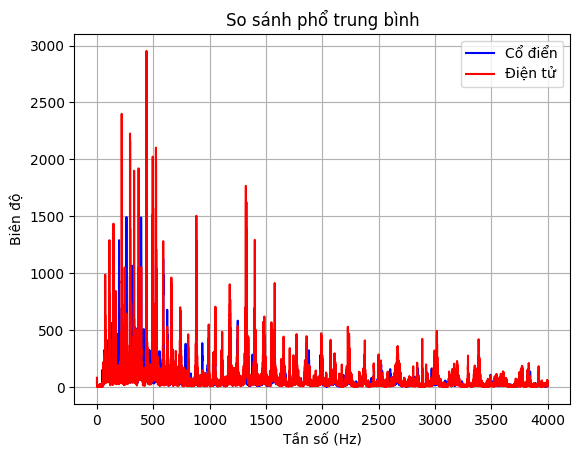

In [9]:
f_classical, m_classical = average_spectrum(classical, base_dir)
f_electronic, m_electronic = average_spectrum(electronic, base_dir)

plt.plot(f_classical, m_classical, label="Cổ điển", color='blue')
plt.plot(f_electronic, m_electronic, label="Điện tử", color='red')
plt.xlabel("Tần số (Hz)")
plt.ylabel("Biên độ")
plt.title("So sánh phổ trung bình")
plt.grid(True)
plt.legend()
plt.show()